In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import seaborn as sns
import statsmodels.regression.linear_model as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import add_constant

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum(axis = 0)

Hours     0
Scores    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


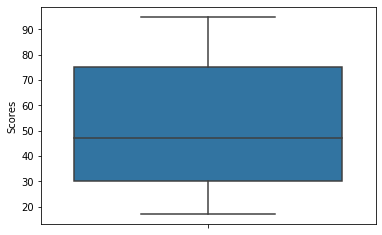

In [7]:
sns.boxplot(y='Scores',data=data)

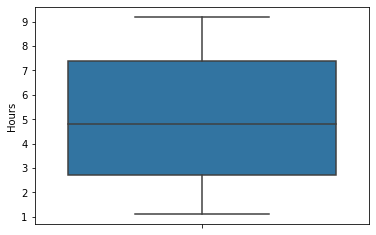

In [8]:
sns.boxplot(y='Hours',data=data)

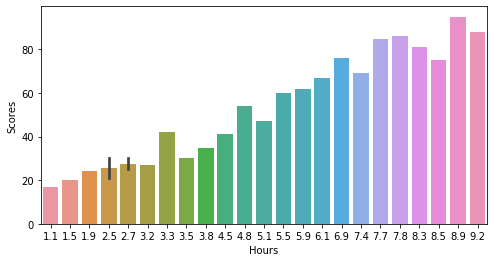

In [9]:
plt.figure(figsize = (8,4))
sns.barplot(x='Hours', y='Scores', data=data)

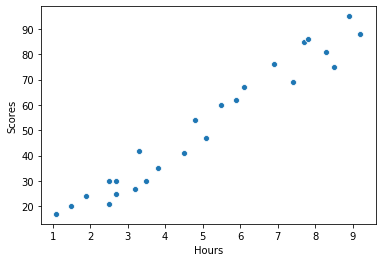

In [10]:
sns.scatterplot(x='Hours',y='Scores',data=data)

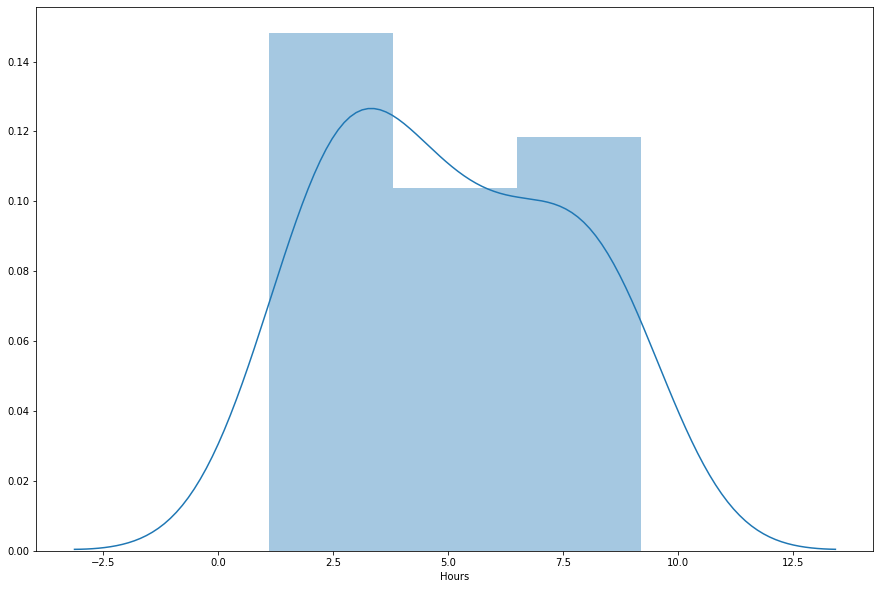

In [63]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Hours'])

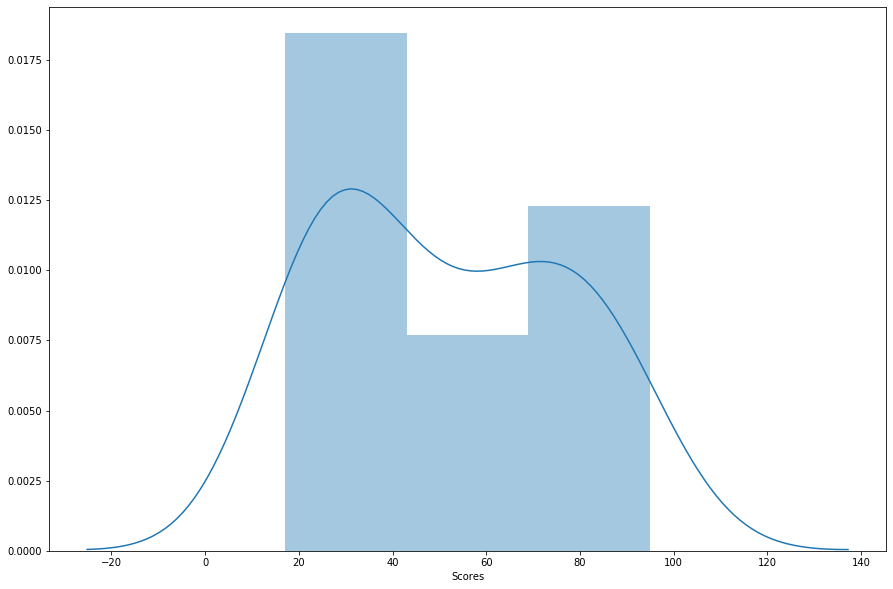

In [64]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['Scores'])

In [72]:
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[1.98942311]
[[9.83544438]]


In [75]:
y_pred = model.predict(x_test)

In [11]:
x = data.drop('Scores',axis=1)
y = data[['Scores']]
# split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=100)

In [12]:
df = pd.concat([y_train,x_train], axis=1)

,Scores,Hours
Scores,1.000000,0.975683
Hours,0.975683,1.000000


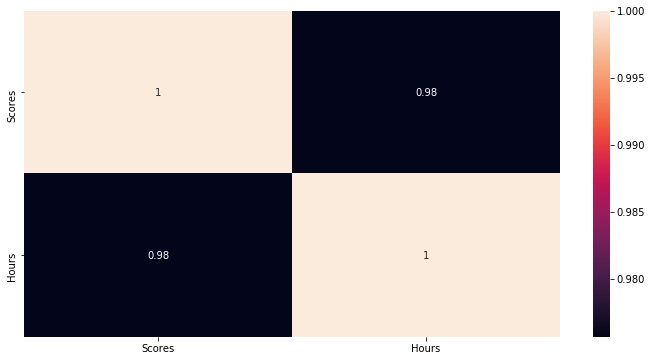

In [13]:
# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
plt.figure(figsize = (12,6))
# plot the correlation heatmap
sns.heatmap(corr,annot = True)

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [66]:
import statsmodels.api as sm1
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_before = data
# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
x1 = sm1.add_constant(df_before)
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index=x1.columns)
series_before

AttributeError: module 'statsmodels.regression.linear_model' has no attribute 'add_constant'

In [52]:
x_test2 = x_test[['Hours']]
x_test2 = sm1.add_constant(x_test2)
y_predict = model.predict(x_test2)
x_test2.head()


,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5


In [53]:
test = pd.concat([x_test, y_test], axis=1)

In [54]:
test['Predicted'] = y_predict

In [55]:
test.head()

,Hours,Scores,Predicted
9,2.7,25,28.545123
22,3.8,35,39.364112
13,3.3,42,34.446390
11,5.9,62,60.018545
5,1.5,20,16.742590


In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.253624060535447
Mean Squared Error: 23.367496221522877
